# Goal: try linear regression with different feature columns, and see which columns give the lowest error.

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing, metrics
from sklearn.utils import shuffle

#Method to (1) set NAN entries to the mean of valid entries in a given column
#          (2) Normalize feature columns 
def fit_nan(data):
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    res = imp.fit_transform(data)
    ss = StandardScaler()
    
    #Normalize feature columns; sets mean to zero and std deviation to 1
    res[:,:-1] = ss.fit_transform(res[:,:-1])
    
    return res

def split_data(data, ratio=0.9):
    X = data[:,:-1]
    y = data[:,-1]
    
    size = int(X.shape[0] * ratio)
    
    return X[:size], y[:size], X[size:], y[size:]

#Method to select only numeric columns from the data frame.
def num_col(data):
    data = data[['LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
    return data

#Method to run linear regression and print results.
def run_regression(train_data, y_train, test_data, y_test, alpha = 0.5):

    from sklearn import linear_model
    
    reg = linear_model.Ridge(alpha)
    
    reg.fit(train_data,y_train)
    y_pred = reg.predict(test_data)
    rmse = np.sqrt(metrics.mean_squared_error(np.log(np.absolute(y_pred)), np.log(np.absolute(y_test))))
    print("Linear regression log mean root-mean-squared error is:", rmse)
    
data_shuffled = shuffle(pd.read_csv("train.csv"))

In [2]:
#Currently the best approach to get a low error.
data = data_shuffled
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = data.select_dtypes(include=numerics)

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
run_regression(train_data, y_train, test_data, y_test)

Linear regression log mean root-mean-squared error is: 0.1430991228200297


In [3]:
#Numerical variables without 'Id' or 'MSSubClass'
data = data_shuffled
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = data.select_dtypes(include=numerics)
#Select numerical variables other than 'Id', 'MSSubClass'.
data = data[['LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
run_regression(train_data, y_train, test_data, y_test)

Linear regression log mean root-mean-squared error is: 0.14524515035895394


In [4]:
#Try prediction with '1stFlrSF'
data = data_shuffled
data = data[['1stFlrSF', 'SalePrice']]

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
run_regression(train_data, y_train, test_data, y_test)

Linear regression log mean root-mean-squared error is: 0.28651628545750585


In [5]:
#Try prediction with '1stFlrSF' and 'TotalBsmtSF'
data = data_shuffled
data = data[['1stFlrSF', 'TotalBsmtSF', 'SalePrice']]

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
run_regression(train_data, y_train, test_data, y_test)

Linear regression log mean root-mean-squared error is: 0.27545068494173436


In [6]:
#How does adding the 'Id' affect the result?
data = data_shuffled
data = data[['Id', '1stFlrSF', 'TotalBsmtSF', 'SalePrice']]
data['Total'] = data['1stFlrSF'] + data['TotalBsmtSF']
data = data[['Total', 'SalePrice']]

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
run_regression(train_data, y_train, test_data, y_test)

Linear regression log mean root-mean-squared error is: 0.27545315714549345


C:\Users\Krishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
#Try the most correlated attribute, OverallQual
data = data_shuffled
data = data[['OverallQual', 'SalePrice']]

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
run_regression(train_data, y_train, test_data, y_test)

Linear regression log mean root-mean-squared error is: 0.25324461429451434


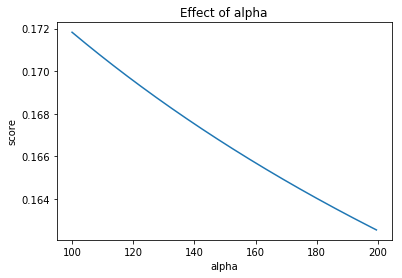

In [3]:
#In the code below, we try to find the best regularization parameter for linear regression.
#TODO: This didn't work out so well... Maybe use a cross-validation set next time.
import matplotlib.pyplot as plt
from sklearn import linear_model

data = data_shuffled
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = data.select_dtypes(include=numerics)

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 0.9)
    
# Establish model
model = linear_model.Ridge(alpha=0)

# Try different numbers of alphas - this will take a minute or so
alphas = np.arange(100, 200, 0.5)
scores = []
for n in alphas:
    model.set_params(alpha=n)
    model.fit(train_data, y_train)
    y_pred = model.predict(test_data)
    scores.append(np.sqrt(metrics.mean_squared_error(np.log(np.absolute(y_pred)), np.log(y_test))))
plt.title("Effect of alpha")
plt.xlabel("alpha")
plt.ylabel("score")
plt.plot(alphas, scores)

# Submission

In [5]:
from sklearn import linear_model

data = num_col(data_shuffled)

train_data, y_train, test_data, y_test = split_data(fit_nan(data), 1)
reg = linear_model.Ridge(0)
reg.fit(train_data, y_train)

submit_data = pd.read_csv('test.csv')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

submit_data = submit_data.select_dtypes(include=numerics)
submit_data = submit_data[['LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'MoSold', 'YrSold']]
submit_data = fit_nan(submit_data)

length = submit_data.shape[0]

pred = reg.predict(submit_data)

In [6]:
submit = pd.DataFrame({'Id': np.arange(1461, 1461+length), 'SalePrice' : pred})
submit.to_csv('01122019.csv', index=False)